# Post-Fire Analysis Datasets Setup - Exploring Datasets

## Turkish Wild Fires data


In [ ]:
!wget https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/hgctmx9y6c-1.zip


--2025-04-07 18:08:57--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/hgctmx9y6c-1.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 3.5.66.18, 3.5.72.189, 3.5.68.194, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|3.5.66.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2418588752 (2.3G) [application/zip]
Saving to: ‘hgctmx9y6c-1.zip’

hgctmx9y6c-1.zip    100%[===================>]   2.25G  24.8MB/s    in 98s     

2025-04-07 18:10:36 (23.5 MB/s) - ‘hgctmx9y6c-1.zip’ saved [2418588752/2418588752]



In [ ]:
!unzip hgctmx9y6c-1.zip


Archive:  hgctmx9y6c-1.zip
  inflating: Deep Learning and Remote Sensing Dataset For Turkeys Wildfire 2021 Multispectral Sentinel-2 Satellite Imagery/Dataset.rar  


In [ ]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
!unrar x "Deep Learning and Remote Sensing Dataset For Turkeys Wildfire 2021 Multispectral Sentinel-2 Satellite Imagery/Dataset.rar" \
         "Deep Learning and Remote Sensing Dataset For Turkeys Wildfire 2021 Multispectral Sentinel-2 Satellite Imagery/"


Streaming output truncated to the last 5000 lines.
Extracting  Deep Learning and Remote Sensing Dataset For Turkeys Wildfire 2021 Multispectral Sentinel-2 Satellite Imagery/Dataset/Train Images/Image (9545).tif      96%  OK 
Extracting  Deep Learning and Remote Sensing Dataset For Turkeys Wildfire 2021 Multispectral Sentinel-2 Satellite Imagery/Dataset/Train Images/Image (9546).tif      96%  OK 
Extracting  Deep Learning and Remote Sensing Dataset For Turkeys Wildfire 2021 Multispectral Sentinel-2 Satellite Imagery/Dataset/Train Images/Image (9547).tif      96%  OK 
Extracting  Deep Learning and Remote Sensing Dataset For Turkeys Wildfire 2021 Multispectral Sentinel-2 Satellite Imagery/Dataset/Train Images/Image (9548).tif      96%  OK 
Extracting  Deep Learning and Remote Sensing Dataset For Turkeys Wildfire 2021 Multispectral Sentinel-2 Satellite Imagery/Dataset/Train Images/Image (9549).tif      96%  OK 
Extracting  Deep Learning and Remo

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 50.7 MB/s eta 0:00:00


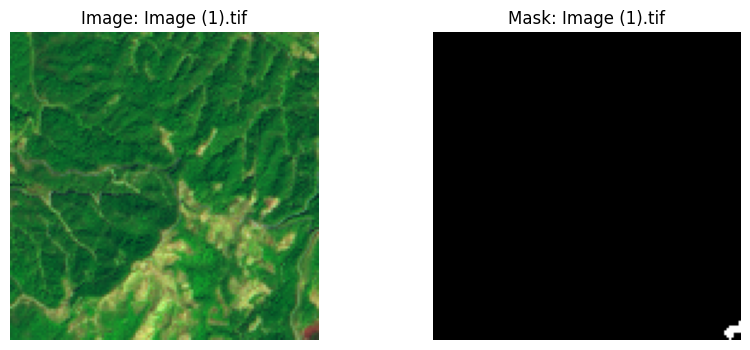

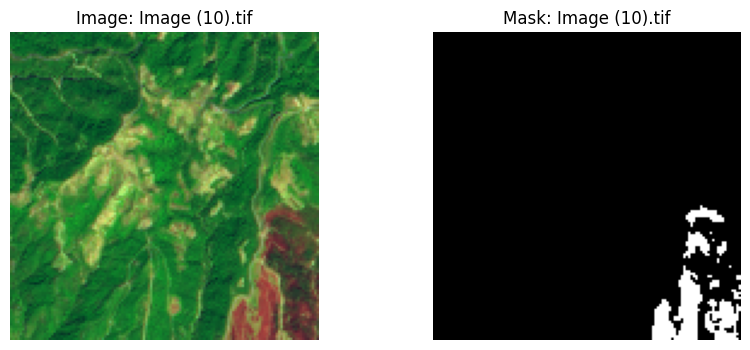

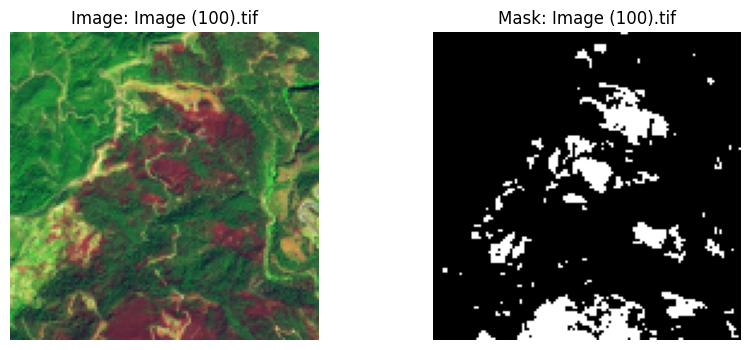

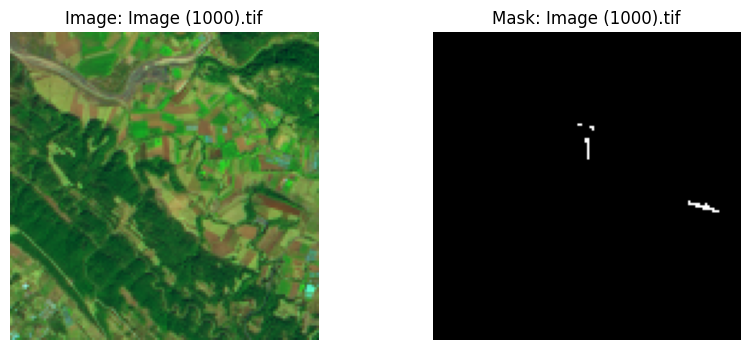

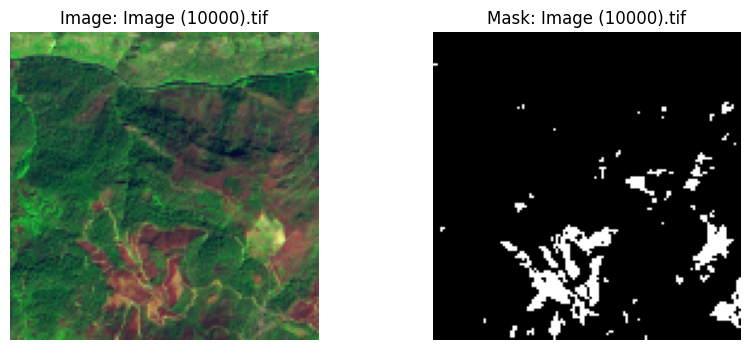

In [ ]:
import os
import matplotlib.pyplot as plt
import rasterio
import numpy as np

image_dir = "Deep Learning and Remote Sensing Dataset For Turkeys Wildfire 2021 Multispectral Sentinel-2 Satellite Imagery/Dataset/Train Images"
mask_dir = "Deep Learning and Remote Sensing Dataset For Turkeys Wildfire 2021 Multispectral Sentinel-2 Satellite Imagery/Dataset/Train Masks"

image_files = sorted(os.listdir(image_dir))
mask_files = sorted(os.listdir(mask_dir))

for i in range(5):
    image_path = os.path.join(image_dir, image_files[i])
    mask_path = os.path.join(mask_dir, mask_files[i])

    with rasterio.open(image_path) as src:
        image = src.read([1, 2, 3]) if src.count >= 3 else np.stack([src.read(1)] * 3)
        image = np.transpose(image, (1, 2, 0))
        image = (image - image.min()) / (image.max() - image.min() + 1e-6)

    with rasterio.open(mask_path) as src:
        mask = src.read(1)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Image: {image_files[i]}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    plt.title(f"Mask: {mask_files[i]}")
    plt.axis("off")

    plt.show()


## EO4WildFires Dataset
### NOTE: Due to the extremely large size of this dataset (25 GB), I have not shown the visualizations, since it exceeds the memory limit on colab.


In [ ]:
!pip install numpy pandas geopandas rasterio rioxarray xarray netCDF4 h5netcdf transformers datasets
!pip install evaluate accelerate matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires n

In [ ]:
from datasets import load_dataset

eo4_dataset = load_dataset(
    'AUA-Informatics-Lab/eo4wildfires',
    split='validation[:3]',
    trust_remote_code=True
)

eo4_dataset.set_format('np')


eo4wildfires.tar.gz:   0%|          | 0.00/25.5G [00:00<?, ?B/s]

files_train.csv.gz:   0%|          | 0.00/58.0k [00:00<?, ?B/s]

files_val.csv.gz:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

files_test.csv.gz:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 2, figsize=(12, 20))

for i, idx in enumerate([0, 16, 789]):
    axes[i][0].imshow(eo4_dataset['validation'][idx]['burned_mask'] * 255)
    axes[i][0].set_title(f'Burned Mask #{idx}')
    axes[i][1].imshow((eo4_dataset['validation'][idx]['S2A'][3:0:-1] * 255).astype(int).transpose(1, 2, 0))
    axes[i][1].set_title(f'Sentinel-2 RGB #{idx}')

plt.tight_layout()
plt.show()

## California Burned Areas Dataset


In [ ]:
!pip install h5py hdf5plugin datasets

from datasets import load_dataset

ca_dataset = load_dataset("DarthReca/california_burned_areas", name="post-fire", trust_remote_code=True)

<ipython-input-25-e08663556d1d>:38: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-e08663556d1d>:38: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


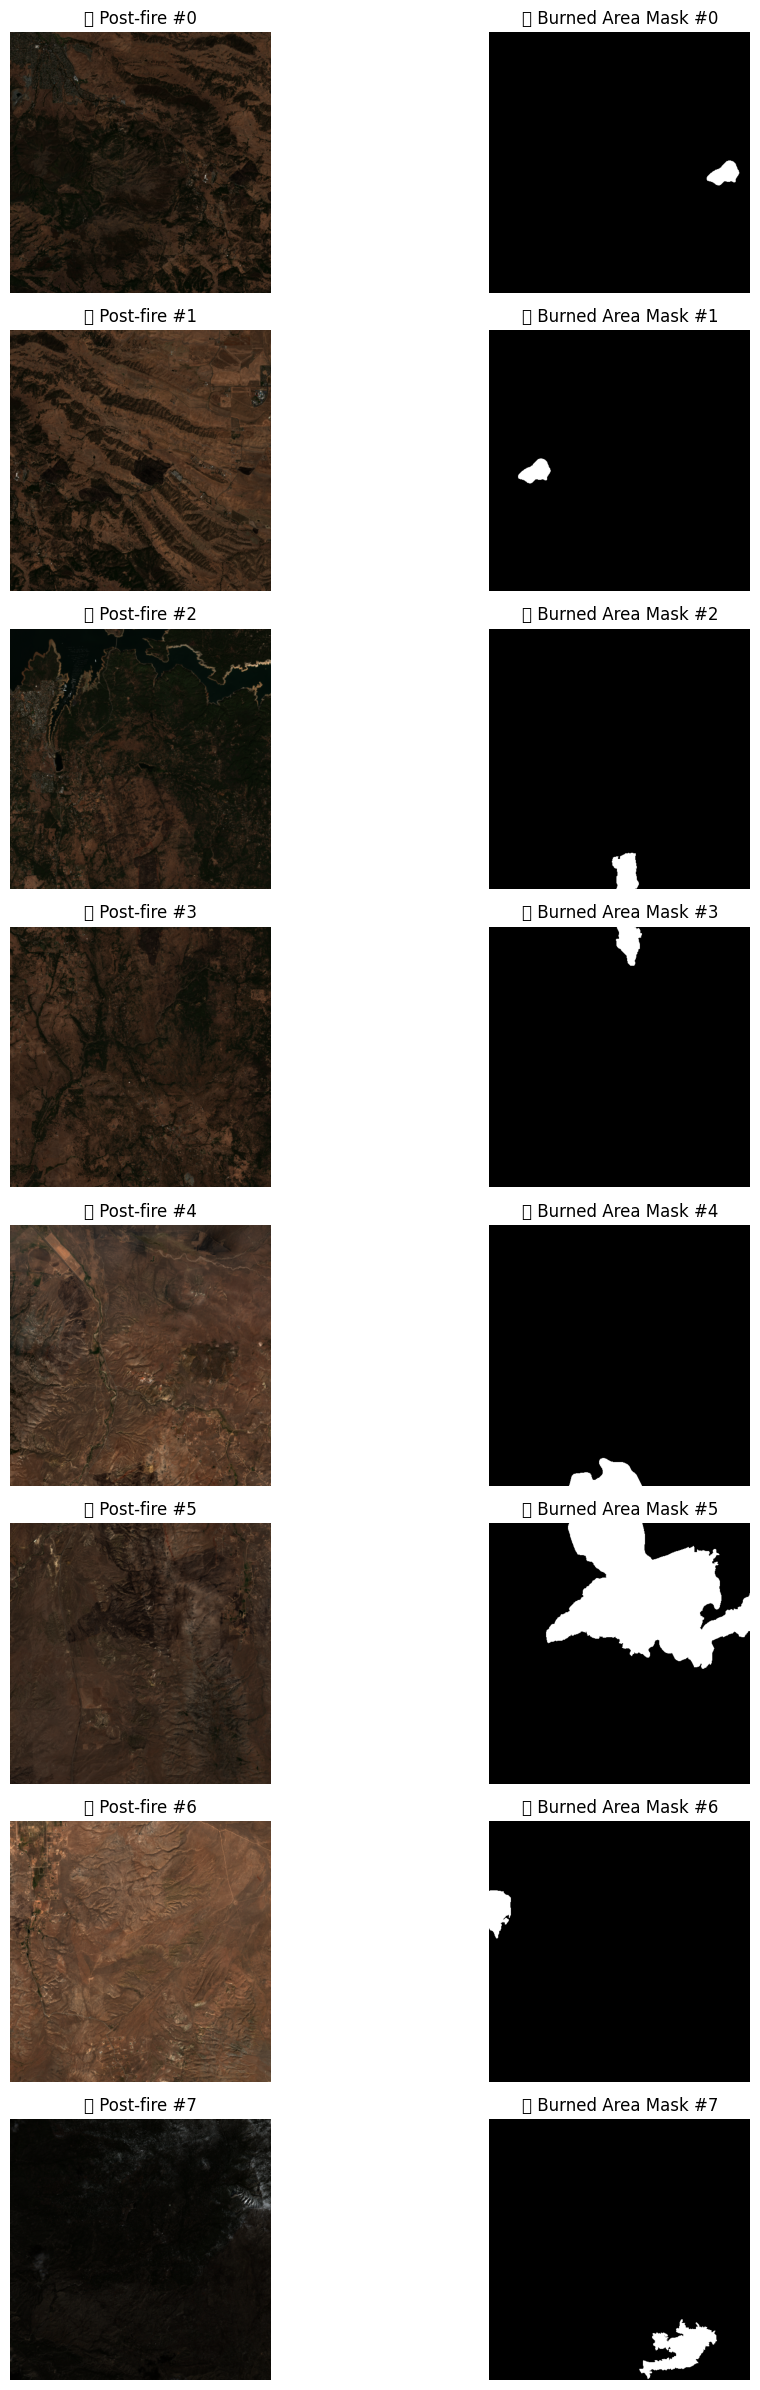

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

split_data = ca_dataset["0"]

num_samples = 8
fig, axs = plt.subplots(num_samples, 2, figsize=(12, num_samples * 3))

shown = 0
i = 0
while shown < num_samples and i < len(split_data):
    sample = split_data[i]
    i += 1
    if "post_fire" not in sample or "mask" not in sample:
        continue

    post_fire = np.array(sample["post_fire"]).astype(np.float32)
    mask = np.array(sample["mask"])

    rgb = post_fire[:, :, [3, 2, 1]]
    rgb -= rgb.min()
    if rgb.max() > 0:
        rgb /= rgb.max()

    axs[shown][0].imshow(rgb)
    axs[shown][0].set_title(f"🌲 Post-fire #{i-1}")
    axs[shown][0].axis("off")

    axs[shown][1].imshow(mask, cmap='gray')
    axs[shown][1].set_title(f"🔥 Burned Area Mask #{i-1}")
    axs[shown][1].axis("off")

    shown += 1

plt.tight_layout()
plt.show()


## Dataset Splitting and Notes

The EO4WildFires, California Burned Areas and Turkish Wildfires datasets come with predefined training and validation splits, which are used directly for experimentation.

Sentinel-2 imagery is perfect for wildfire analysis due to its high resolution, multispectral bands, and global open access, making it a good choice for both regional and global postfire analysis.


### Custom Pakistan Dataset

 A custom dataset can be created for Pakistan using Sentinel-2 imagery and NASA FIRMS fire detections to support local segmentation and burnt area estimation.
